# Series temporales
Nuestra variable independiente será el tiempo que lo denotaremos por t $\to$ 
* ``si vamos al  pasado`` se expresará t-1, t-2, t-3,... 
* ``si vamos al  futuro`` se expresará t+1, t+2, t+3,... 

* Estacionaria --> 
    * ``se mantega la media`` 
    * `` sea homocedástica`` = se mantenga la varianza

In [1]:
## Librerias
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from pandas_datareader import data as web
from pydataset import data
plt.style.use('ggplot')

In [2]:
comienzo=datetime(2010,1,1)
final=datetime(2020,3,10)

In [3]:
final-comienzo

datetime.timedelta(days=3721)

In [7]:
df = pd.read_csv('./Datos/Index2018.csv')

In [8]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [9]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [10]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [11]:
df.date=pd.to_datetime(df.date,dayfirst=True)

In [12]:
df.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

In [13]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


<AxesSubplot:>

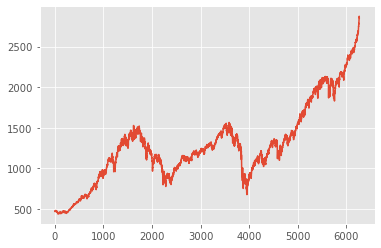

In [14]:
df.spx.plot()

<AxesSubplot:>

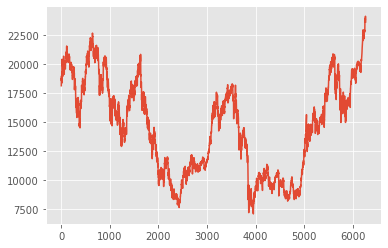

In [15]:
df.nikkei.plot()

In [16]:
df_fecha=df.copy()

In [17]:
df_fecha.set_index("date",inplace=True)

<AxesSubplot:xlabel='date'>

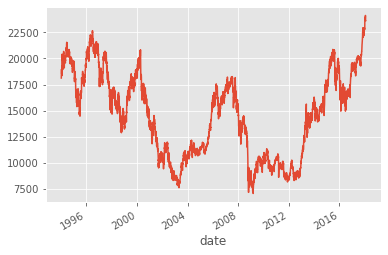

In [18]:
df_fecha.nikkei.plot()

In [20]:
df_fecha.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [21]:
## Frecuencia diaria
df_fecha.asfreq('d')

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


In [23]:
## Frecuencia último día del mes
df_fecha.asfreq('M')

,spx,dax,ftse,nikkei
date,,,,
1994-01-31,481.610000,2192.60,3491.830000,20229.12
1994-02-28,467.140000,2103.24,3328.100000,19997.20
1994-03-31,445.770000,2142.88,3086.400000,19111.92
1994-04-30,NaN,NaN,NaN,NaN
1994-05-31,456.500000,2137.34,2970.500000,20973.59
...,...,...,...,...
2017-08-31,2471.650208,12055.84,7430.622829,19646.24
2017-09-30,NaN,NaN,NaN,NaN
2017-10-31,2575.263830,13229.57,7493.078749,22011.61


In [28]:
## Para rellenar los nulos
## usando forward fill
df_fecha.asfreq('d',method="ffill")

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,469.900000,2224.95,3445.980000,18124.01
1994-01-09,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,2872.867839,13340.17,7665.541292,23631.88


In [29]:
## usando back fill
df_fecha.asfreq('d',method="bfill")

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,475.270000,2225.00,3440.580000,18443.44
1994-01-09,475.270000,2225.00,3440.580000,18443.44
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,2853.528411,13324.48,7671.533300,23629.34


In [24]:
## Frecuencia último día del mes laborable
df_fecha.asfreq('BM')

,spx,dax,ftse,nikkei
date,,,,
1994-01-31,481.610000,2192.60,3491.830000,20229.12
1994-02-28,467.140000,2103.24,3328.100000,19997.20
1994-03-31,445.770000,2142.88,3086.400000,19111.92
1994-04-29,450.910000,2252.51,3125.340000,19725.25
1994-05-31,456.500000,2137.34,2970.500000,20973.59
...,...,...,...,...
2017-08-31,2471.650208,12055.84,7430.622829,19646.24
2017-09-29,2519.359672,12828.86,7372.757540,20356.28
2017-10-31,2575.263830,13229.57,7493.078749,22011.61


In [25]:
df_fecha.asfreq('BM').isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [27]:
## Cierre de trimestre
df_fecha.asfreq('BQ')

,spx,dax,ftse,nikkei
date,,,,
1994-03-31,445.770000,2142.88,3086.400000,19111.920
1994-06-30,444.270000,2020.85,2919.200000,20643.930
1994-09-30,462.690000,2002.30,3026.300000,19563.810
1994-12-30,459.270000,2097.51,3065.540000,19723.060
1995-03-31,500.710000,1914.69,3137.900000,16139.950
1995-06-30,544.750000,2089.04,3314.600000,14517.400
1995-09-29,584.410000,2200.65,3508.250000,17913.060
1995-12-29,615.930000,2260.69,3689.300000,19868.150
1996-03-29,645.500000,2489.35,3699.700000,21406.850


#### Calcular tasas de variación por "Día"
* Tasa de Variación 

$\cfrac{VF-VI}{VI}=\cfrac{VF}{VI}-1$

## Ejercicio
Calcular la tasa de variación de cada una de las columnas generando una nueva columna

Sería el valor de la fila i partido el valor de la fila i-1 y despues restarlo por 1

In [32]:
df["nikkei_lag1"]=df["nikkei"].shift(1)

In [34]:
df_fecha["nikkei_tv"]=df_fecha["nikkei"]/df_fecha["nikkei"].shift(1) - 1

In [36]:
df_fecha.head()

,spx,dax,ftse,nikkei,nikkei_tv
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,0.017625
1994-01-11,474.13,2228.10,3413.77,18485.25,0.002267
1994-01-12,474.17,2182.06,3372.02,18793.88,0.016696
1994-01-13,472.47,2142.37,3360.01,18577.26,-0.011526


In [37]:
def calculo_tv(df,columna):
    return df[columna]/df[columna].shift(1) - 1

In [39]:
ciclo,tendencia=sm.tsa.filters.hpfilter(df["nikkei"])

In [40]:
df["Tendencia_Nikkei"]=tendencia

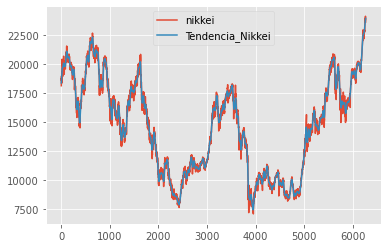

In [41]:
df[["nikkei","Tendencia_Nikkei"]].plot();

In [47]:
df["nikkei_MV"]=df["nikkei"].rolling(5).mean()

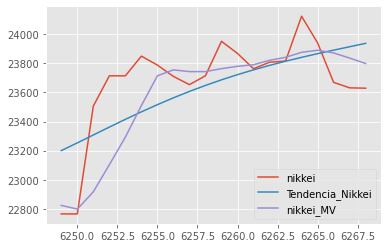

In [48]:
df[["nikkei","Tendencia_Nikkei","nikkei_MV"]].tail(20).plot();

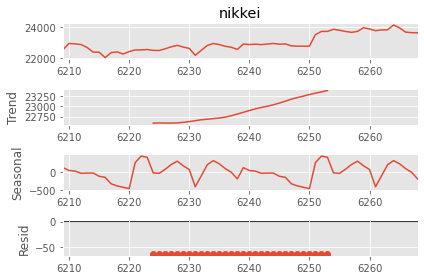

In [52]:
sm.tsa.seasonal_decompose(df["nikkei"].tail(60),model="additive",period=30).plot();

## machie learning
utilizabamos la función train_test_split y ``cogíamos`` una muestra aleatoria

In [53]:
tamanyo=int(len(df)*0.7)
df_train=df.iloc[:tamanyo]
df_test=df.iloc[tamanyo:]

In [54]:
## Estacionariedad
import statsmodels.tsa.stattools as sts

In [55]:
sts.adfuller(df.nikkei)

(-1.3325519284122853,
 0.6141513556407439,
 1,
 6267,
 {'1%': -3.4313938775326336,
  '5%': -2.862001301519361,
  '10%': -2.5670155478252497},
 83757.33488614437)

$$ H_0: \text{Los datos son no estacionarios}$$
$$ H_1: \text{Los datos son estacionarios}$$


In [57]:
print("El p valor es: {0:.2f}".format(sts.adfuller(df.nikkei)[1]))

El p valor es: 0.61


In [58]:
## Suavizado de datos
### Metodo de Holt-Winters

In [59]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [60]:
cantidad=5
alpha=2/(cantidad+1)

In [64]:
### otra manera de medias moviles
df["nikkei_5"]=df["nikkei"].ewm(alpha=alpha).mean()

In [62]:
df.head()

,date,spx,dax,ftse,nikkei,nikkei_lag1,Tendencia_Nikkei,nikkei_MV,nikei_5
0,1994-01-07,469.90,2224.95,3445.98,18124.01,NaN,18369.030051,NaN,18124.010000
1,1994-01-10,475.27,2225.00,3440.58,18443.44,18124.01,18442.942093,NaN,18315.668000
2,1994-01-11,474.13,2228.10,3413.77,18485.25,18443.44,18516.700998,NaN,18395.996316
3,1994-01-12,474.17,2182.06,3372.02,18793.88,18485.25,18590.153938,NaN,18561.271077
4,1994-01-13,472.47,2142.37,3360.01,18577.26,18793.88,18663.128432,18484.768,18567.409005


<AxesSubplot:>

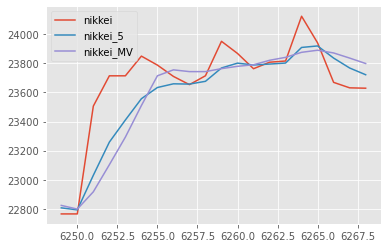

In [67]:
df[["nikkei","nikkei_5","nikkei_MV"]].tail(20).plot()

In [68]:
df["nikkei_EXPS"]=SimpleExpSmoothing(df["nikkei"]).fit(smoothing_level=alpha).fittedvalues

<AxesSubplot:>

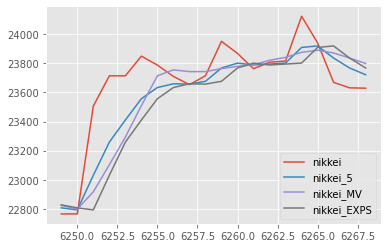

In [69]:
df[["nikkei","nikkei_5","nikkei_MV","nikkei_EXPS"]].tail(20).plot()

In [71]:
## Doble suavizado
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [74]:
df["nikkei_EXPS"]=ExponentialSmoothing(df["nikkei"]).fit(smoothing_level=alpha).fittedvalues.shift(-1)

<AxesSubplot:>

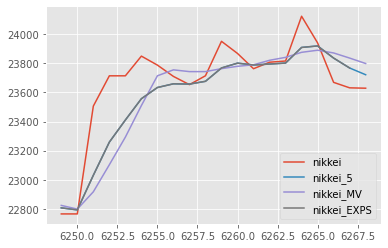

In [75]:
df[["nikkei","nikkei_5","nikkei_MV","nikkei_EXPS"]].tail(20).plot()

In [77]:
## Suavizado triple
df["nikkei_EXPS"]=ExponentialSmoothing(df["nikkei"],trend="add",seasonal="add",seasonal_periods=12).fit(smoothing_level=alpha).fittedvalues

c:\Users\Daniel Montes\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:>

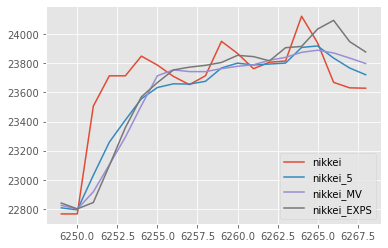

In [78]:
df[["nikkei","nikkei_5","nikkei_MV","nikkei_EXPS"]].tail(20).plot()

In [81]:
modelo=ExponentialSmoothing(df["nikkei"],trend="add",seasonal="add",seasonal_periods=12).fit()

c:\Users\Daniel Montes\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [83]:
prediccion_20=modelo.forecast(20)

<AxesSubplot:>

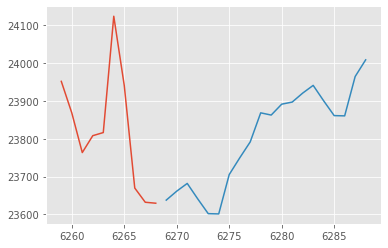

In [85]:
df["nikkei"].tail(10).plot()
prediccion_20.plot(label="Prediccion modelo aditivo")